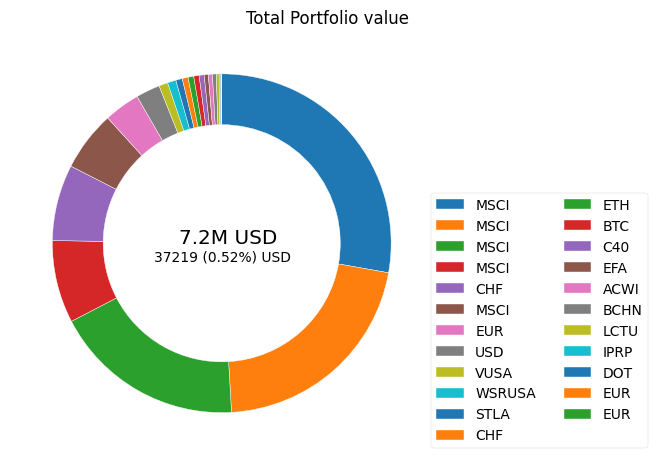

In [79]:
from Session import get_user, create_session, Session, User
from Portfolios import Portfolio
from datetime import datetime, timedelta
from analytics import profit_and_losses, position_values
from dateutils import get_last_business_day
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from charts import position_values_chart, get_labels_from_identifiers


u:User = get_user("smarc@smarcsoft.com")
s:Session = create_session(u)
my_portfolio:Portfolio = s.load_portfolio("DEFAULT")

# Get last available valuation date
last_eval_date:datetime = get_last_business_day(my_portfolio.valuator().get_end_date())

#Display portfolio structure
position_values = position_values(my_portfolio, last_eval_date, "USD")
position_values.index = get_labels_from_identifiers(position_values.index)
position_values.sort_values(ascending=False, inplace=True)
#position_values_chart(position_values, last_eval_date.date(), "USD")
plt.style.use('seaborn-notebook')
fig,ax = plt.subplots()
ax.pie(position_values, labels = position_values.index, labeldistance=None, wedgeprops=dict(width=0.3, edgecolor='w'), counterclock=False, startangle=90)
ax.legend(position_values.index, loc = 'lower center', bbox_to_anchor=(0.75,0,1,1), ncol=2)


# Compute today's P&L
#Compute the P&L of the portfolio consituents between the last 2 days
previous_day = last_eval_date - timedelta(days=1)
pandls= profit_and_losses(my_portfolio, last_eval_date, previous_day, 'USD')
plt.title(x=0.75,label="Total Portfolio value")
plt.text(-0.25, 0.0, f'{my_portfolio.valuator().get_valuation(valdate=last_eval_date, ccy="USD")/1000000:.2}M USD', fontsize='x-large')
plt.text(-0.4, -0.1, f'{pandls["portfolio"]["pandl_absolute"]:.0f} ({pandls["portfolio"]["pandl_pct"]:.2}%) USD')
plt.show()

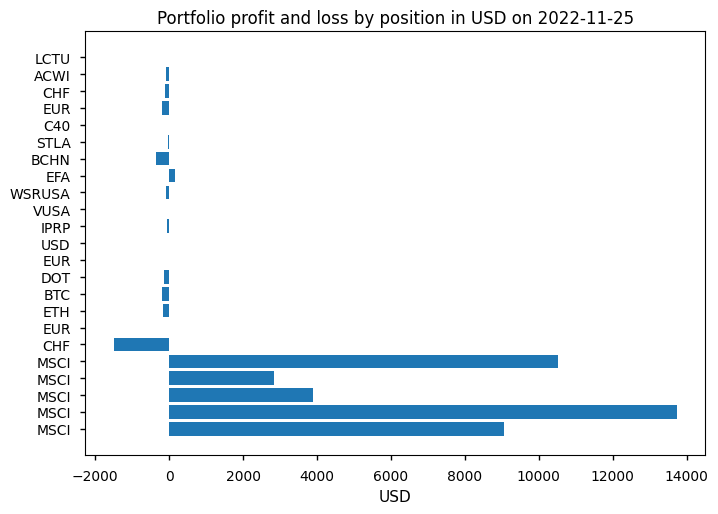

In [80]:
from charts import profit_and_losses_chart, get_labels_from_identifiers


pd.set_option("display.width", 150)
pd.set_option("display.max_colwidth", 100)
df = pandls['positions']

# Create a graph of the P&Ls
# Extract pretty printable position identifiers
ppi= get_labels_from_identifiers(df.index)

s = pd.Series(df['pandls'].values, ppi)
profit_and_losses_chart(s, last_eval_date.date(), "USD")
# plt.style.use('seaborn-notebook')
# fig,ax = plt.subplots()
# y_pos = np.arange(len(ppi))
# ax.barh(y_pos, )
# ax.set_yticks(y_pos, labels=ppi)
# ax.set_title(f"Portfolio profit and loss: {pandls['portfolio']['pandl_absolute']:.2f} USD on {last_eval_date.date()}")
# ax.set_xlabel("USD")
plt.show()